## Quick look at SMAP data
- from https://github.com/NoemiVergopolan/SMAP-HydroBlocks_postprocessing
- processed here for HARV and SCBI
#### to subset data at more sites:
  - conda activate mapping
  

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
year = (list(range(2016,2020,1)))
year = [str(year).zfill(4)  for year in year]

month = list(range(1,13,1))
month = [str(month).zfill(2) for month in month]
 
ym = [y+'-'+m for y in year for m in month ]
print(ym)

#[(pattern_lnd1[0]+'.{times}.nc').format(year=year) for times in times]

#YearMonth [ varATM in varATM]

['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']


In [59]:
site = ['HARV','SCBI']
for i in range(len(site)):
    fin = '/glade/p/cgd/tss/people/wwieder/SMAP-HydroBlocks_postprocessing/SMAPHB_sample_'+site[i]+ \
          '/SMAP-HB_surface-soil-moisture_30m_monthly.netcdf/'
    finAll = [fin+'SMAP-HB_surface-soil-moisture_30m_monthly_'+ym+'.nc' for ym in ym]
    if i == 0:
        ds = xr.open_mfdataset(finAll, decode_times=True)
    else:
        ds0 = xr.open_mfdataset(finAll, decode_times=True)


In [60]:
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

custom_map = custom_div_cmap(13, maxcol='blue', midcol='0.9' ,mincol='saddleBrown')

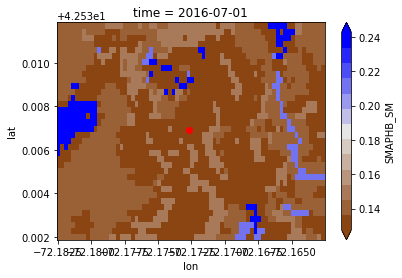

In [64]:
#custom_map = custom_div_cmap(11, maxcol='royalBlue', midcol='0.9' ,mincol='peru')#'saddleBrown')
ds.SMAPHB_SM.isel(time=6).plot(cmap=custom_map,robust=True)
plt.plot(-72.17265,42.53691,'o',color='red') ; #HARV
plt.plot(-78.13949, 38.89292, 'o',color='red') ; #SCBI

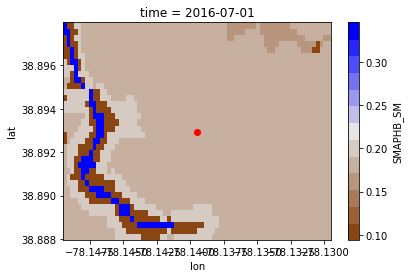

In [65]:
ds0.SMAPHB_SM.isel(time=6).plot(cmap=custom_map,robust=True)
plt.plot(-72.17265,42.53691,'o',color='red') ; #HARV
plt.plot(-78.13949, 38.89292, 'o',color='red') ; #SCBI

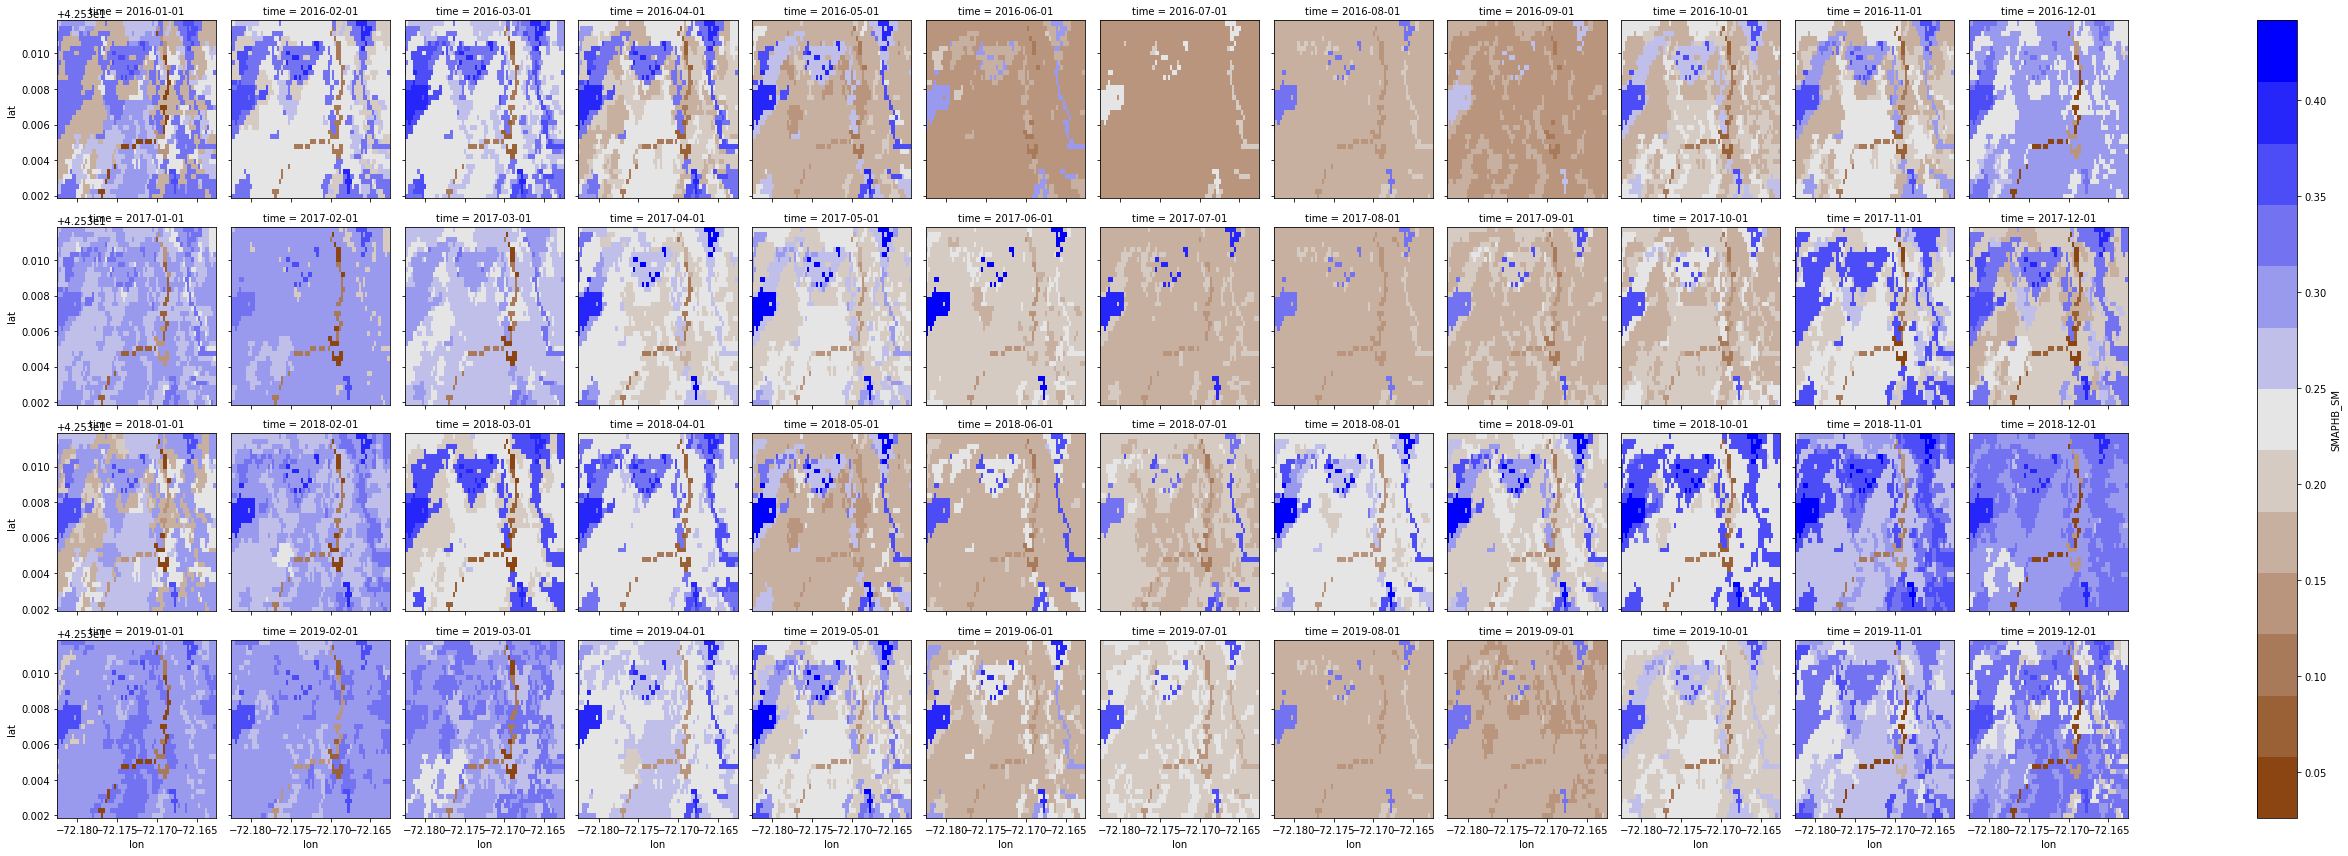

In [66]:
ds.SMAPHB_SM.plot(x="lon", y="lat", col="time", col_wrap=12, cmap=custom_map) ;

In [54]:
#ds.SMAPHB_SM.isel(time=slice(-13,-1)).plot(x="lon", y="lat", col="time", col_wrap=3, cmap=custom_map) ;

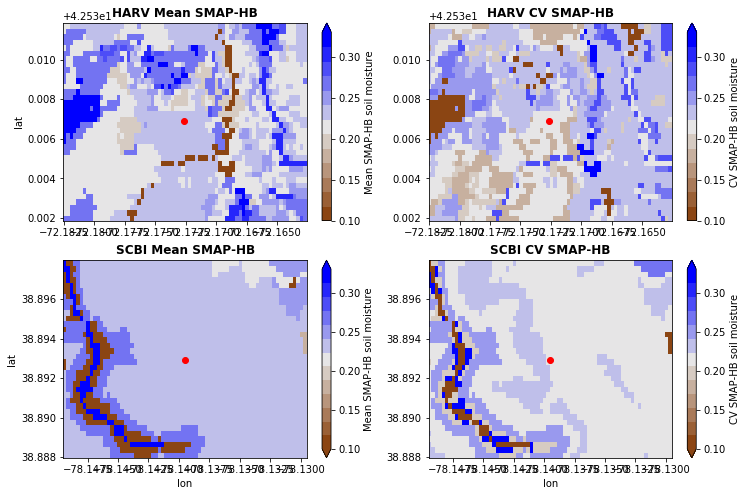

In [76]:
vmax=0.33
vmin=0.10
plt.figure(figsize=(12,8))

plt.subplot(221)
alpha = ds.SMAPHB_SM.mean('time')
alpha.attrs['long_name'] = 'Mean SMAP-HB soil moisture'
alpha.plot(cmap=custom_map,vmax=vmax,vmin=vmin)
plt.plot(-72.17265,42.53691,'o',color='red') ; #HARV
plt.title(site[0]+' Mean SMAP-HB',fontweight='bold')
plt.xlabel(None) 

plt.subplot(222)
beta = (ds.SMAPHB_SM.std('time')/ds.SMAPHB_SM.mean('time'))
beta.attrs['long_name'] = 'CV SMAP-HB soil moisture'
beta.plot(cmap=custom_map,vmax=vmax,vmin=vmin)
plt.plot(-72.17265,42.53691,'o',color='red') ; #HARV
plt.title(site[0]+' CV SMAP-HB',fontweight='bold')
plt.ylabel(None) 
plt.xlabel(None) 

plt.subplot(223)
alpha = ds0.SMAPHB_SM.mean('time')
alpha.attrs['long_name'] = 'Mean SMAP-HB soil moisture'
alpha.plot(cmap=custom_map,vmax=vmax,vmin=vmin)
plt.plot(-78.13949, 38.89292, 'o',color='red') ; #SCBI
plt.title(site[1]+' Mean SMAP-HB',fontweight='bold')

plt.subplot(224)
beta = (ds0.SMAPHB_SM.std('time')/ds0.SMAPHB_SM.mean('time'))
beta.attrs['long_name'] = 'CV SMAP-HB soil moisture'
beta.plot(cmap=custom_map,vmax=vmax,vmin=vmin)
plt.plot(-78.13949, 38.89292, 'o',color='red') ; #SCBI
plt.title(site[1]+' CV SMAP-HB',fontweight='bold')
plt.ylabel(None) ;



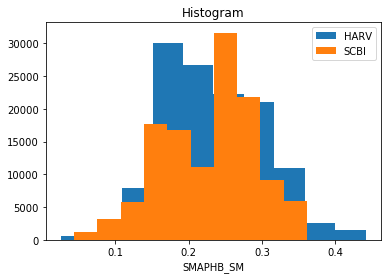

In [84]:
# all data points, all months
ds.SMAPHB_SM.plot(label=site[0])
ds0.SMAPHB_SM.plot(label=site[1])
plt.legend() ;

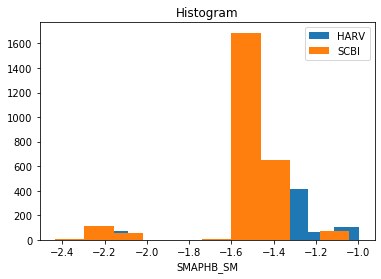

In [88]:
# Histogram of temporal means for each pixel
ds.SMAPHB_SM.mean('time').plot.hist(label=site[0])
ds0.SMAPHB_SM.mean('time').plot.hist(label=site[1])
plt.legend() ;